# N-beam study

In [141]:
from utils import*;imp.reload(dsp)
import io,os,pandas as pd,numpy as np
from subprocess import check_output
# import misc_utils as mut;imp.reload(mut)
from IPython.display import display, Markdown, Latex
import EDutils
from EDutils import utilities as ut 
from blochwave import bloch          ;imp.reload(bloch)
from blochwave import bloch_pp as bl ;imp.reload(bl)
from scipy import integrate
%matplotlib inline

print(check_output(
    'cd {ed_path}; git log | head -n1'.format(
        ed_path=os.path.dirname(os.path.realpath(EDutils.__file__+'/..'))),
    shell=True).decode())

cif_file='resources/LTA.cif'
figs = (18,5)
rock_path=lambda name:'dat/LTA/rocks/%s' %name
rock_file=lambda name:rock_path(name)+'/rock_.pkl'

# dsp.matplotlib.use('agg')

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
commit 545083d467b93d98dd89690d96bd46d3392eb765



## Setup
We choose a random orientation $\mathbf u$ around which we want to simulate a rocking curve.

In [33]:
u  = np.array([0.66865363, 0.29164837, 0.6521759 ])
u  = u/np.linalg.norm(u)

Sargs=dict(cif_file=cif_file,Smax=0.005,keV=200,Nmax=10,solve=False)
b=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
b.show_df_G(n=10)

imported file : resources/LTA.cif
...Nmax... 
...Excitation errors... 
...Vg... 
object saved
dat/LTA/LTA212_200keV_bloch.pkl
                   Sw        Fg     Ikin       Vg      Uga   xi_g
(0, 0, 0)    -2.9e-15  0.0+0.0j      0.0 0.00e+00  0.0e+00    inf
(-8, 0, 8)   -1.4e-05 -3.7+0.0j     13.9 2.21e-03  9.8e-04  40758
(4, 4, -6)    1.5e-04 -1.5-0.0j      2.2 8.88e-04  3.9e-04 101352
(2, -7, 1)   -3.1e-04  4.1-0.0j     16.4 2.41e-03  1.1e-03  37430
(-7, -7, 10) -3.3e-04  2.2+0.0j      4.7 1.29e-03  5.7e-04  69710
(5, 6, -8)   -4.0e-04 -4.9+0.0j     24.1 2.91e-03  1.3e-03  30911
(10, -8, -7) -6.7e-04  1.3-0.0j      1.8 7.98e-04  3.5e-04 112750
(8, -10, -4) -8.3e-04  5.0-0.0j     25.4 2.99e-03  1.3e-03  30092
(3, 2, -4)   -9.0e-04 -0.2+0.0j      0.0 1.04e-04  4.6e-05 866401
(7, -3, -6)   9.0e-04  3.2+0.0j     10.5 1.93e-03  8.5e-04  46709


In [57]:
uvw=ut.get_uvw(u,osc=2,npts=101)

name = 'Nbeam'
rock_path='dat/LTA/rocks/%s' %name
rock_file=rock_path+'/rock_.pkl'
rock = bl.Bloch_cont(path=rock_path,uvw=uvw,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )

### Excitation errors

69 beam within sw_min=5.00e-05
too many beams 69/50 : keeping only top 50


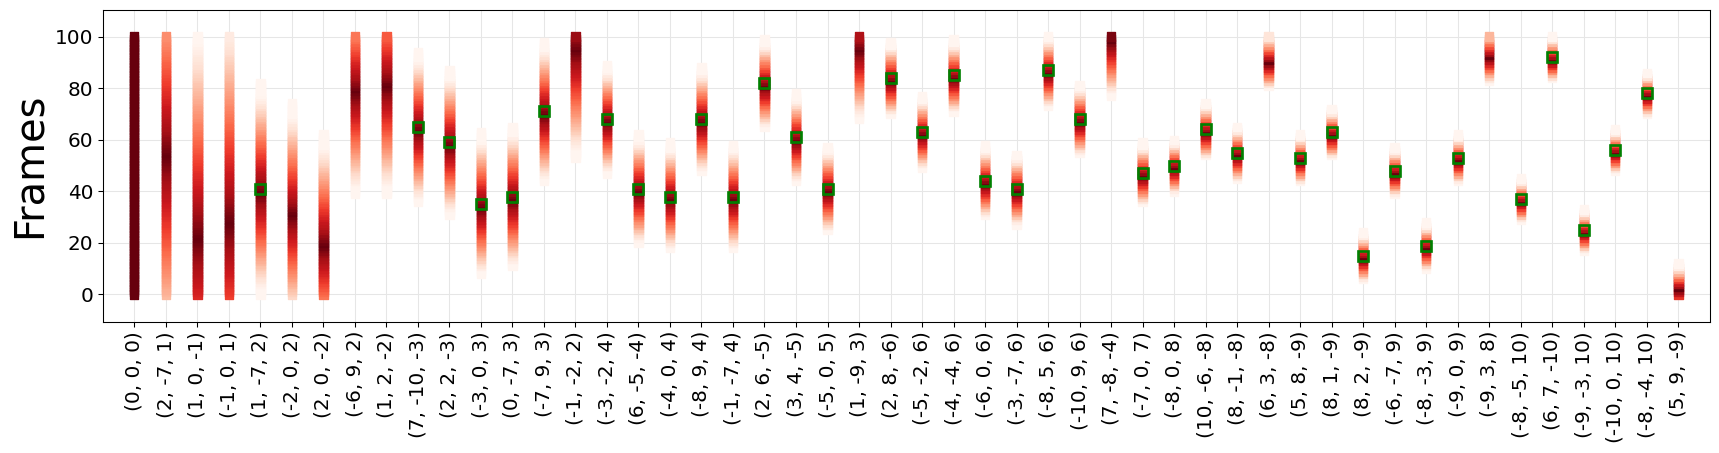

In [53]:
rock=ut.load_pkl(rock_file)
fig,ax=rock.show_excitation_map(vm=0.0045,sw_min=5e-5,nb_max=50,figs=figs);

### Solve

In [75]:
rock.do('solve',Smax=0.01,thicks=np.arange(10,5001,10))

 ...assembling 142x142 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
 ...assembling 143x143 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
 ...assembling 141x141 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
 ...assembling 142x142 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
 ...assembling 143x143 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam/u-frame__004.pkl
objec

In [81]:
rock=ut.load_pkl(rock_file)
rock.do('_set_beams_vs_thickness', thicks=np.arange(10,5001,10))

... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__000.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__001.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__002.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__003.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__004.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__005.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__006.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__007.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__008.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__009.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__010.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__011.pkl
... beam vs thickness ...
object saved
dat/LTA/rocks/Nbeam/u-frame__012.pkl
... beam vs 

### Rocking curves

In [62]:
zs=[100,200,300,400,500]
hklf=rock.get_full_refl(Swm=0.0045)
rep = lambda s:s.replace(', ','_').replace('(','').replace(')','')
for h in hklf:
    fig,ax=rock.plot_rocking(refl=[h],zs=zs,figsize=figs,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')


removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-1_-7_4.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-1_-9_5.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_0_10.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_2_9.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_4_8.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_5_8.png
removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots
Saving figure :
figs/rock_Nbeam_-10_6_7.png
removing Friedel pairs
total number of beams:1
gathering the intensi

In [433]:
h0=str((-3,0,3))
txt='![](figs/rock_Nbeam_%s.png)' %(rep(h0))
display(Markdown(txt))
# h0 in hklf

![](figs/rock_Nbeam_-3_0_3.png)

In [301]:
n=5 #number of images per rows
nrows=len(hklf)//n
hs_=np.reshape(hklf[:n*nrows],(nrows,n))
name='Nbeam'
txt=''
for hs in hs_:
    txt +='\n%s\n%s --\n%s\n'%(
        ' | ' .join(hs),
        ' -- | '*(len(hs)-1),
        ' | '.join([ '![](figs/rock_%s_%s.png)' %(name,rep(h)) for h in hs] ),
    )
# print(txt)
# display(Markdown(txt))



(-1, -7, 4) | (-1, -9, 5) | (-10, 0, 10) | (-10, 2, 9) | (-10, 4, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-1_-7_4.png) | ![](figs/rock_Nbeam_-1_-9_5.png) | ![](figs/rock_Nbeam_-10_0_10.png) | ![](figs/rock_Nbeam_-10_2_9.png) | ![](figs/rock_Nbeam_-10_4_8.png)

(-10, 5, 8) | (-10, 6, 7) | (-10, 7, 7) | (-10, 9, 6) | (-2, -7, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-10_5_8.png) | ![](figs/rock_Nbeam_-10_6_7.png) | ![](figs/rock_Nbeam_-10_7_7.png) | ![](figs/rock_Nbeam_-10_9_6.png) | ![](figs/rock_Nbeam_-2_-7_5.png)

(-2, -9, 6) | (-3, -10, 7) | (-3, -2, 4) | (-3, -7, 6) | (-3, -9, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-2_-9_6.png) | ![](figs/rock_Nbeam_-3_-10_7.png) | ![](figs/rock_Nbeam_-3_-2_4.png) | ![](figs/rock_Nbeam_-3_-7_6.png) | ![](figs/rock_Nbeam_-3_-9_7.png)

(-3, 0, 3) | (-4, -10, 8) | (-4, -2, 5) | (-4, -4, 6) | (-4, -5, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-3_0_3.png) | ![](figs/rock_Nbeam_-4_-10_8.png) | ![](figs/rock_Nbeam_-4_-2_5.png) | ![](figs/rock_Nbeam_-4_-4_6.png) | ![](figs/rock_Nbeam_-4_-5_6.png)

(-4, -7, 7) | (-4, -9, 8) | (-4, 0, 4) | (-5, -10, 9) | (-5, -2, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-4_-7_7.png) | ![](figs/rock_Nbeam_-4_-9_8.png) | ![](figs/rock_Nbeam_-4_0_4.png) | ![](figs/rock_Nbeam_-5_-10_9.png) | ![](figs/rock_Nbeam_-5_-2_6.png)

(-5, -4, 7) | (-5, -5, 7) | (-5, -7, 8) | (-5, -9, 9) | (-5, 0, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-5_-4_7.png) | ![](figs/rock_Nbeam_-5_-5_7.png) | ![](figs/rock_Nbeam_-5_-7_8.png) | ![](figs/rock_Nbeam_-5_-9_9.png) | ![](figs/rock_Nbeam_-5_0_5.png)

(-6, -10, 10) | (-6, -2, 7) | (-6, -4, 8) | (-6, -5, 8) | (-6, -7, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-6_-10_10.png) | ![](figs/rock_Nbeam_-6_-2_7.png) | ![](figs/rock_Nbeam_-6_-4_8.png) | ![](figs/rock_Nbeam_-6_-5_8.png) | ![](figs/rock_Nbeam_-6_-7_9.png)

(-6, -9, 10) | (-6, 0, 6) | (-6, 2, 5) | (-7, -2, 8) | (-7, -3, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-6_-9_10.png) | ![](figs/rock_Nbeam_-6_0_6.png) | ![](figs/rock_Nbeam_-6_2_5.png) | ![](figs/rock_Nbeam_-7_-2_8.png) | ![](figs/rock_Nbeam_-7_-3_8.png)

(-7, -4, 9) | (-7, -5, 9) | (-7, -6, 10) | (-7, -8, 10) | (-7, 0, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-7_-4_9.png) | ![](figs/rock_Nbeam_-7_-5_9.png) | ![](figs/rock_Nbeam_-7_-6_10.png) | ![](figs/rock_Nbeam_-7_-8_10.png) | ![](figs/rock_Nbeam_-7_0_7.png)

(-7, 2, 6) | (-7, 9, 3) | (-8, -2, 9) | (-8, -3, 9) | (-8, -4, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-7_2_6.png) | ![](figs/rock_Nbeam_-7_9_3.png) | ![](figs/rock_Nbeam_-8_-2_9.png) | ![](figs/rock_Nbeam_-8_-3_9.png) | ![](figs/rock_Nbeam_-8_-4_10.png)

(-8, -5, 10) | (-8, 0, 8) | (-8, 2, 7) | (-8, 4, 6) | (-8, 5, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-8_-5_10.png) | ![](figs/rock_Nbeam_-8_0_8.png) | ![](figs/rock_Nbeam_-8_2_7.png) | ![](figs/rock_Nbeam_-8_4_6.png) | ![](figs/rock_Nbeam_-8_5_6.png)

(-8, 7, 5) | (-8, 9, 4) | (-9, -2, 10) | (-9, -3, 10) | (-9, 0, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-8_7_5.png) | ![](figs/rock_Nbeam_-8_9_4.png) | ![](figs/rock_Nbeam_-9_-2_10.png) | ![](figs/rock_Nbeam_-9_-3_10.png) | ![](figs/rock_Nbeam_-9_0_9.png)

(-9, 2, 8) | (-9, 4, 7) | (-9, 5, 7) | (-9, 7, 6) | (-9, 9, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_-9_2_8.png) | ![](figs/rock_Nbeam_-9_4_7.png) | ![](figs/rock_Nbeam_-9_5_7.png) | ![](figs/rock_Nbeam_-9_7_6.png) | ![](figs/rock_Nbeam_-9_9_5.png)

(0, -7, 3) | (0, -9, 4) | (1, -7, 2) | (10, -1, -10) | (10, -10, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_0_-7_3.png) | ![](figs/rock_Nbeam_0_-9_4.png) | ![](figs/rock_Nbeam_1_-7_2.png) | ![](figs/rock_Nbeam_10_-1_-10.png) | ![](figs/rock_Nbeam_10_-10_-6.png)

(10, -2, -10) | (10, -4, -9) | (10, -5, -8) | (10, -6, -8) | (10, -8, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_10_-2_-10.png) | ![](figs/rock_Nbeam_10_-4_-9.png) | ![](figs/rock_Nbeam_10_-5_-8.png) | ![](figs/rock_Nbeam_10_-6_-8.png) | ![](figs/rock_Nbeam_10_-8_-7.png)

(2, 10, -7) | (2, 2, -3) | (2, 4, -4) | (2, 6, -5) | (2, 8, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_2_10_-7.png) | ![](figs/rock_Nbeam_2_2_-3.png) | ![](figs/rock_Nbeam_2_4_-4.png) | ![](figs/rock_Nbeam_2_6_-5.png) | ![](figs/rock_Nbeam_2_8_-6.png)

(3, 10, -8) | (3, 2, -4) | (3, 4, -5) | (3, 6, -6) | (3, 8, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_3_10_-8.png) | ![](figs/rock_Nbeam_3_2_-4.png) | ![](figs/rock_Nbeam_3_4_-5.png) | ![](figs/rock_Nbeam_3_6_-6.png) | ![](figs/rock_Nbeam_3_8_-7.png)

(4, 10, -9) | (4, 2, -5) | (4, 4, -6) | (4, 6, -7) | (4, 8, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_4_10_-9.png) | ![](figs/rock_Nbeam_4_2_-5.png) | ![](figs/rock_Nbeam_4_4_-6.png) | ![](figs/rock_Nbeam_4_6_-7.png) | ![](figs/rock_Nbeam_4_8_-8.png)

(5, -5, -3) | (5, 10, -10) | (5, 2, -6) | (5, 4, -7) | (5, 6, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_5_-5_-3.png) | ![](figs/rock_Nbeam_5_10_-10.png) | ![](figs/rock_Nbeam_5_2_-6.png) | ![](figs/rock_Nbeam_5_4_-7.png) | ![](figs/rock_Nbeam_5_6_-8.png)

(5, 8, -9) | (6, -1, -6) | (6, -3, -5) | (6, -5, -4) | (6, 1, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_5_8_-9.png) | ![](figs/rock_Nbeam_6_-1_-6.png) | ![](figs/rock_Nbeam_6_-3_-5.png) | ![](figs/rock_Nbeam_6_-5_-4.png) | ![](figs/rock_Nbeam_6_1_-7.png)

(6, 2, -7) | (6, 4, -8) | (6, 6, -9) | (6, 7, -10) | (6, 8, -10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_6_2_-7.png) | ![](figs/rock_Nbeam_6_4_-8.png) | ![](figs/rock_Nbeam_6_6_-9.png) | ![](figs/rock_Nbeam_6_7_-10.png) | ![](figs/rock_Nbeam_6_8_-10.png)

(7, -1, -7) | (7, -10, -3) | (7, -3, -6) | (7, -5, -5) | (7, 1, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_7_-1_-7.png) | ![](figs/rock_Nbeam_7_-10_-3.png) | ![](figs/rock_Nbeam_7_-3_-6.png) | ![](figs/rock_Nbeam_7_-5_-5.png) | ![](figs/rock_Nbeam_7_1_-8.png)

(7, 2, -8) | (7, 3, -9) | (7, 4, -9) | (7, 5, -10) | (8, -1, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_7_2_-8.png) | ![](figs/rock_Nbeam_7_3_-9.png) | ![](figs/rock_Nbeam_7_4_-9.png) | ![](figs/rock_Nbeam_7_5_-10.png) | ![](figs/rock_Nbeam_8_-1_-8.png)

(8, -10, -4) | (8, -3, -7) | (8, -5, -6) | (8, -8, -5) | (8, 1, -9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_8_-10_-4.png) | ![](figs/rock_Nbeam_8_-3_-7.png) | ![](figs/rock_Nbeam_8_-5_-6.png) | ![](figs/rock_Nbeam_8_-8_-5.png) | ![](figs/rock_Nbeam_8_1_-9.png)

(8, 2, -9) | (8, 4, -10) | (9, -1, -9) | (9, -10, -5) | (9, -3, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_8_2_-9.png) | ![](figs/rock_Nbeam_8_4_-10.png) | ![](figs/rock_Nbeam_9_-1_-9.png) | ![](figs/rock_Nbeam_9_-10_-5.png) | ![](figs/rock_Nbeam_9_-3_-8.png)

(9, -4, -8) | (9, -5, -7) | (9, -6, -7) | (9, -8, -6) | (9, 2, -10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_9_-4_-8.png) | ![](figs/rock_Nbeam_9_-5_-7.png) | ![](figs/rock_Nbeam_9_-6_-7.png) | ![](figs/rock_Nbeam_9_-8_-6.png) | ![](figs/rock_Nbeam_9_2_-10.png)


## (-5,0,5) reflection 

Let's look at the rocking specifically around reflection $(-5,0,5)$.

In [184]:
h=str((-5,0,5))
df_Fhkl = pd.read_pickle(b.get_Fhkl_pkl())
df_Fhkl['Fga']  = np.real(np.abs(df_Fhkl.F))
df_Fhkl['Ug']   = np.real(np.abs(df_Fhkl.F*cst.meff(200)/(np.pi*b.crys.volume)))
df_Fhkl['xi_g'] = b.k0/df_Fhkl.Ug
df_Fhkl.loc[[h]]

name = '-5_0_5'

u=rock.df.u[rock.beams.loc[h].f_cen]
# b0=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
# b0.show_df_G()
uvw__505=ut.get_uvw(u,osc=0.2,npts=101)

In [ ]:
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))
rock__505 = bl.Bloch_cont(path=rock_path(name),uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )


Let's gather all the reflections in bragg condition at each point of the rocking curve.  

In [172]:
all_beams = [rock__505.load(i).df_G.sort_values('Swa')[['Sw','Uga','xi_g']] for i in range(rock__50_5.n_simus)]

### Rocking curve

removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots


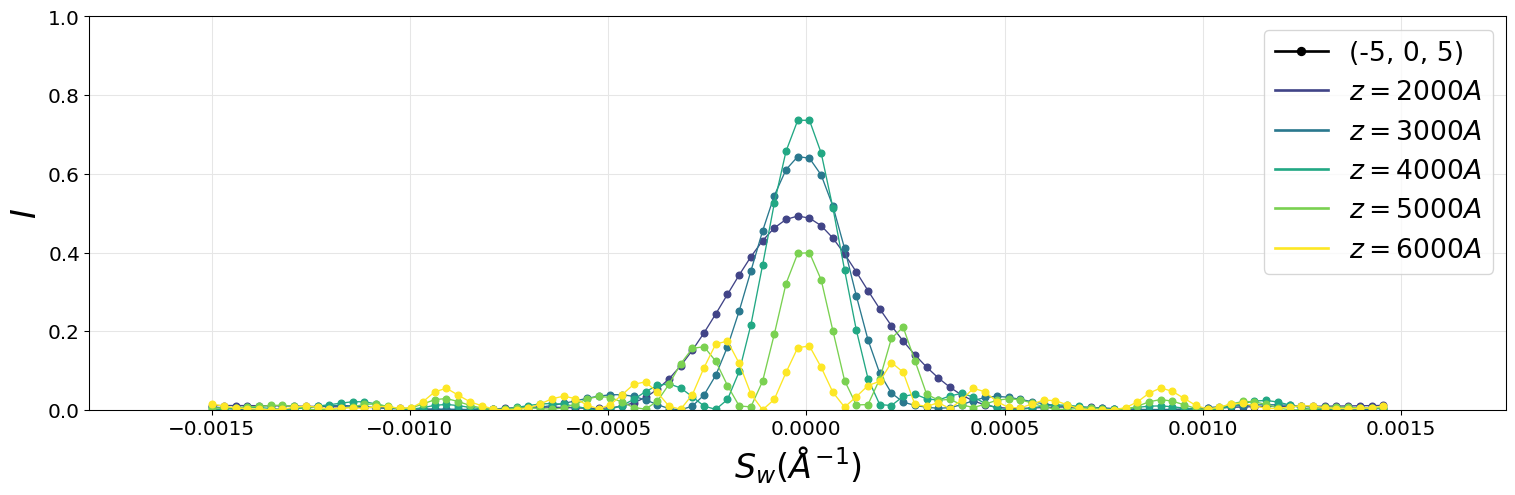

In [185]:
rock__505=ut.load_pkl(rock_file(name))
# rock__50_5.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
# print('plot')
zs = [2000,3000,4000,5000,6000]
rock__505.plot_rocking(refl=[h],zs=zs,figsize=figs,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

### 3 beam study 
In this study we will simulate rockings of some selected beams and only include the influence of the strongest neighbouring beam at each point of the rocking curve.


In [186]:
hkls = [hs.index[:3].values.tolist() for hs in all_beams]
_hkls=[]
for hs in hkls : 
    if h not in hs: hs[-1]=h
    _hkls.append(np.array([eval(h) for h in hs]))

name = '-5_0_5_3x3'

In [ ]:
Sargs.update(dict(Smax=0.01,opts='sv0',solve=True))
rock__505_3x3 = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )

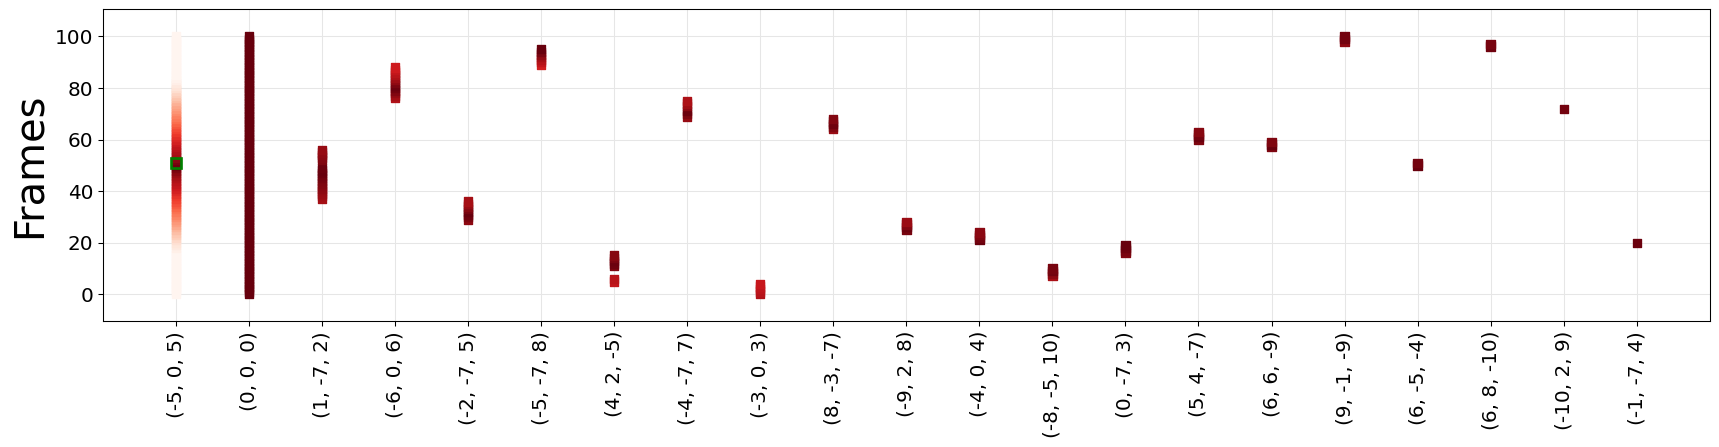

In [180]:
fig,ax=rock__505_3x3.show_excitation_map(vm=0.001,sw_min=5e-5,nb_max=50,figs=figs);

removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots


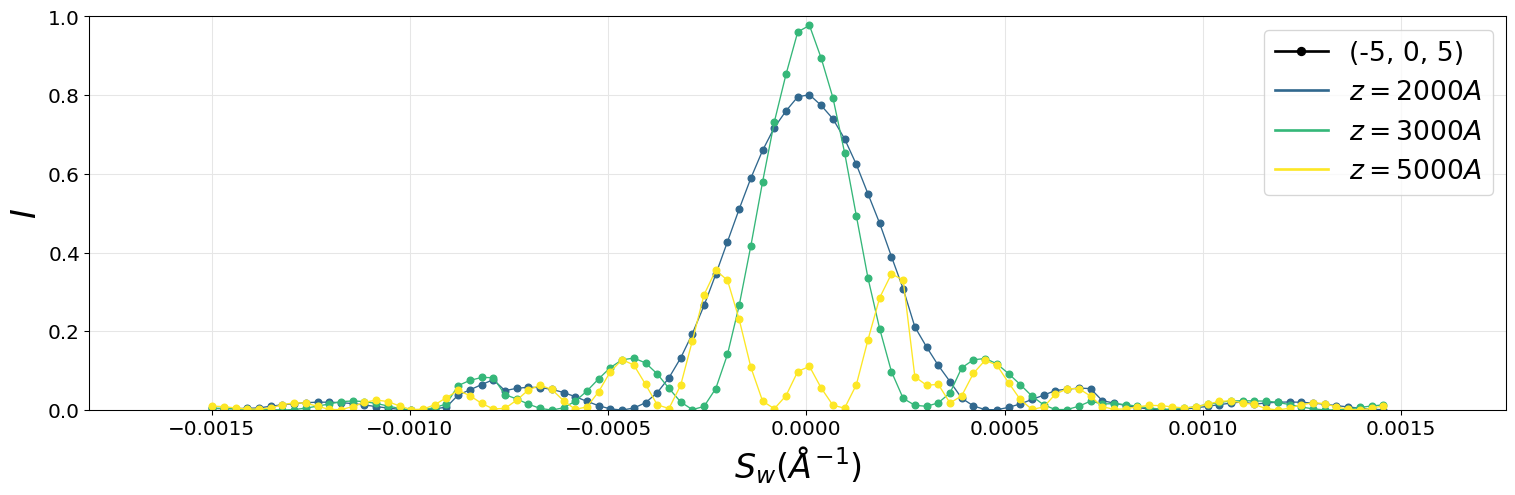

In [187]:
zs = [2000,3000,5000]
rock__505_3x3.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
rock__505_3x3.plot_rocking(refl=[h],zs=zs,figsize=figs,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

### Increasing the number of beams 

In [224]:
Nbeams = np.arange(2,50).tolist()
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))

for N in Nbeams : 
    hkls = [hs.index[:N].values.tolist() for hs in all_beams]
    _hkls=[]
    for hs in hkls : 
        if h not in hs: hs[-1]=h
        _hkls.append(np.array([eval(h) for h in hs]))
    
    name = '-5_0_5_%dx%d' %(N,N)
    r = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )
    r.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)


imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__006

In [302]:
zs = [1000]
Iz=[ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]
#full dynamic 
Iend=rock__505.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock__505.df.nbeams.mean()
sw = r.beams.loc[h].Sw
#kinematic
xi_g,t=np.real(df_Fhkl.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gathering the intensities
removing Friedel pairs
total number of beams:1
gath

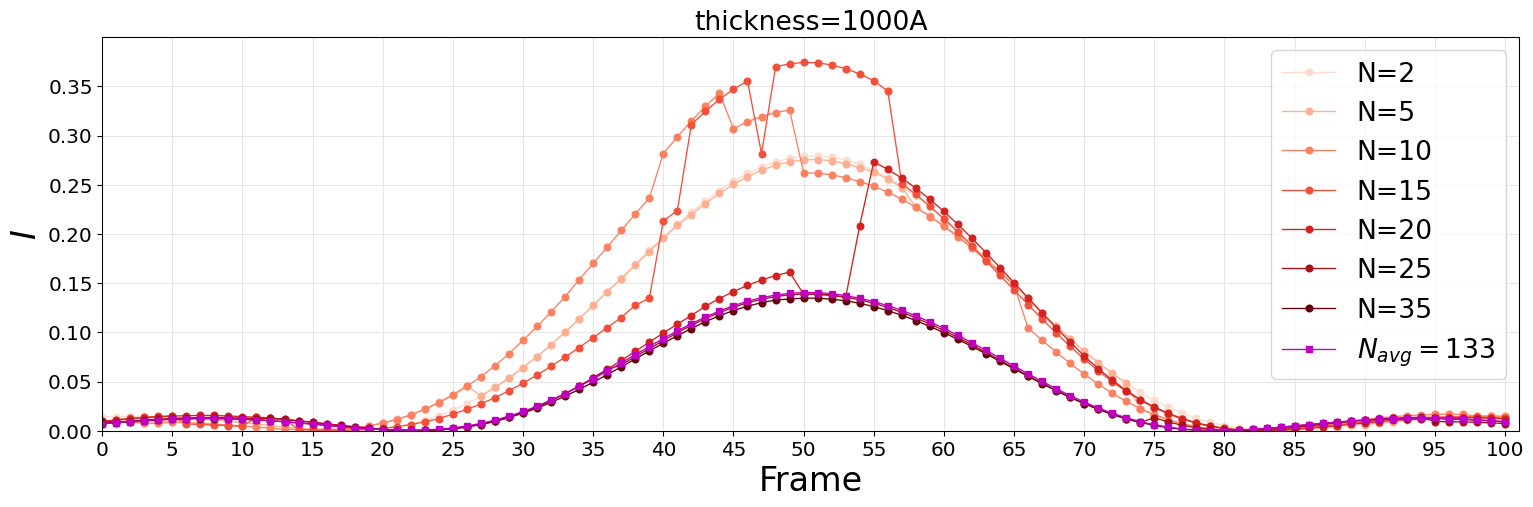

In [473]:
# fig,ax=dsp.create_fig(figsize=figs)
idx = [0,3,8,13,18,23,33]
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'

cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
# plts+=[[x,Ikin,'b-s','kin']]

dsp.stddisp(plts,labs=[xlab,'$I$'],xyTicks=[5,0.05],
            xylims=[0,101,0,0.4],title='thickness=%dA' %zs[0], 
            figsize=figs);

In [436]:
# imp.reload(mut)
_hkls=np.array(mut.get_hkls(all_beams,24,h=str((-5,0,5)),index=True))
# print(_hkls[39])
get_b=lambda i:print('%s -> %s '  %(np.setdiff1d(_hkls[i],_hkls[i+1])[0],np.setdiff1d(_hkls[i+1],_hkls[i])[0]))
get_b(71)
# get_b(53)
# get_b(54)
# get_b(50)
# get_b(51)
# all_beams

(-3, 0, 3) -> (9, -1, -9) 


### Integration

In [449]:
for N in Nbeams : 
    r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N)))
    r._integrate_rocking(refl=[h])

object saved
dat/LTA/rocks/-5_0_5_2x2/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_3x3/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_4x4/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_5x5/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_6x6/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_7x7/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_8x8/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_9x9/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_10x10/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_11x11/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_12x12/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_13x13/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_14x14/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_15x15/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_16x16/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks

In [463]:
## kinematic integration
from scipy import integrate
xi_g=np.real(df_Fhkl.loc[h].xi_g)
r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(2,2)))
sw,z=np.array(r.beams.loc[h].Sw),r.load(0).z
# print(len(sw),z.shape)
Ikin = lambda sg,t,xi_g : ((np.pi*t/xi_g)*np.sinc(sg*t))**2
Ikins = np.array([integrate.trapz(Ikin(sw,t,xi_g),sw) for t in z])


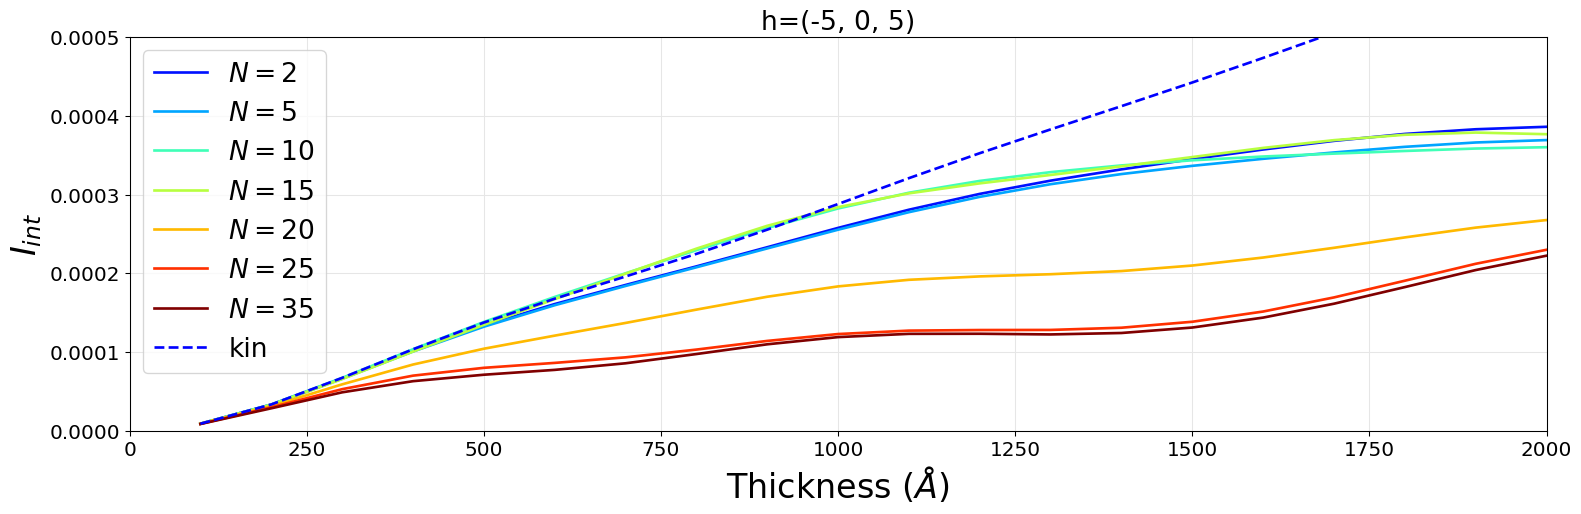

In [475]:
z = ut.load_pkl(rock_file('-5_0_5_%dx%d' %(2,2))).load(0).z
idx = [0,3,8,13,18,23,33]
cs = dsp.getCs('jet',len(np.array(Nbeams)[idx]))

plts=[[z,ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).Iz_dyn[h],c,'$N=%d$' %N] for N,c in zip(np.array(Nbeams)[idx],cs)]
plts+=[[z,Ikins,'b--','kin']]
dsp.stddisp(plts,labs=['Thickness ($\AA$)','$I_{int}$'],#xyTicks=[5,0.05],
            xylims=[0,2000,0,0.0005],#,0,0.4],
            title='h=%s' %h, figsize=figs,lw=2);